## History LDA Model Visualizationa and Analysis
This notebook looks exclusively at discharge notes and the history section within them

In [ ]:
#import necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import re
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
from datetime import datetime
dateparse = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in dates]
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import necessary packages for further word processing
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2020)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /global/homes/d/dsmorrow/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#function to perform lemmatize and stem preprocessing steps on the data set.
def lemmatize_stemming(text):
    stemmer = PorterStemmer()
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

In [5]:
full_proc = pd.read_csv("Full_Table_ICD9_Notes.csv", usecols=["CATEGORY",'text_processed', "index"])
full_proc

,CATEGORY,text_processed,index
0,Discharge summary,admission date 2142 5 15 discharge date 2142 5...,0
1,Discharge summary,admission date 2142 5 20 discharge date 2142 6...,1
2,Discharge summary,admission date 2142 6 18 discharge date 2142 6...,2
3,Discharge summary,admission date 2142 7 3 discharge date 2142 7 ...,3
4,Discharge summary,admission date 2142 7 7 discharge date 2142 7 ...,4
...,...,...,...
323055,Radiology,last name lf first name3 lf 1046 j last name ...,323055
323056,Radiology,2143 9 3 9 59 am chest pa lat clip clip numbe...,323056
323057,Radiology,2144 2 25 1 49 pm ankle ap mortise lat left c...,323057
323058,Radiology,2144 1 7 4 21 pm ankle ap mortise lat left cl...,323058


In [6]:
#select only for discharge summary so we can look exclusively at history
full_proc = full_proc.loc[full_proc['CATEGORY'] == 'Discharge summary']

In [7]:
full_proc

,CATEGORY,text_processed,index
0,Discharge summary,admission date 2142 5 15 discharge date 2142 5...,0
1,Discharge summary,admission date 2142 5 20 discharge date 2142 6...,1
2,Discharge summary,admission date 2142 6 18 discharge date 2142 6...,2
3,Discharge summary,admission date 2142 7 3 discharge date 2142 7 ...,3
4,Discharge summary,admission date 2142 7 7 discharge date 2142 7 ...,4
...,...,...,...
322904,Discharge summary,admission date 2169 1 31 discharge date 2169 2...,322904
322923,Discharge summary,admission date 2113 1 25 discharge date 2113 1...,322923
322927,Discharge summary,admission date 2135 9 12 discharge date 2135 9...,322927
322946,Discharge summary,admission date 2175 7 6 discharge date 2175 7 ...,322946


In [8]:
#select for all the history section in the notes
full_proc['history'] = full_proc["text_processed"].apply(lambda st: st[st.find("history of present illness")+len("history of present illness"):st.find("physical exam")])

In [9]:
full_proc.head()

,CATEGORY,text_processed,index,history
0,Discharge summary,admission date 2142 5 15 discharge date 2142 5...,0,24 year old female with sle esrd on hd hx mal...
1,Discharge summary,admission date 2142 5 20 discharge date 2142 6...,1,ms known lastname is a 24 yo f with lupus sin...
2,Discharge summary,admission date 2142 6 18 discharge date 2142 6...,2,please see micu note for full details in brie...
3,Discharge summary,admission date 2142 7 3 discharge date 2142 7 ...,3,24f h o sle esrd on hd h o malignant htn svc ...
4,Discharge summary,admission date 2142 7 7 discharge date 2142 7 ...,4,24f h o sle esrd on hd h o malignant htn svc ...


In [10]:
#remove the sub headers in the history section
full_proc['WO_Headers'] = full_proc["history"].map(lambda x: re.sub('family history', '', x))
full_proc['WO_Headers'] = full_proc["WO_Headers"].map(lambda x: re.sub('social history', '', x))
full_proc['WO_Headers'] = full_proc["WO_Headers"].map(lambda x: re.sub('past medical history', '', x))

In [11]:
full_proc.head()

,CATEGORY,text_processed,index,history,WO_Headers
0,Discharge summary,admission date 2142 5 15 discharge date 2142 5...,0,24 year old female with sle esrd on hd hx mal...,24 year old female with sle esrd on hd hx mal...
1,Discharge summary,admission date 2142 5 20 discharge date 2142 6...,1,ms known lastname is a 24 yo f with lupus sin...,ms known lastname is a 24 yo f with lupus sin...
2,Discharge summary,admission date 2142 6 18 discharge date 2142 6...,2,please see micu note for full details in brie...,please see micu note for full details in brie...
3,Discharge summary,admission date 2142 7 3 discharge date 2142 7 ...,3,24f h o sle esrd on hd h o malignant htn svc ...,24f h o sle esrd on hd h o malignant htn svc ...
4,Discharge summary,admission date 2142 7 7 discharge date 2142 7 ...,4,24f h o sle esrd on hd h o malignant htn svc ...,24f h o sle esrd on hd h o malignant htn svc ...


In [12]:
#full_proc.to_csv('History_Notes.csv')

In [13]:
doc_group1 = full_proc

In [14]:
#use preprocess function on the history section of the notes without headers included
processed_docs = doc_group1['WO_Headers'].map(preprocess)
processed_docs

0         [year, old, femal, sle, esrd, malign, htn, svc...
1         [know, lastnam, lupu, age, esrd, malign, htn, ...
2         [micu, note, detail, brief, woman, sle, esrd, ...
3         [sle, esrd, malign, htn, svc, syndrom, pre, pr...
4         [sle, esrd, malign, htn, svc, syndrom, pre, pr...
                                ...                        
322904    [year, old, gentleman, histori, mitral, valv, ...
322923    [present, elect, angiogram, coil, mca, aneurys...
322927    [year, old, femal, larg, ascend, aortic, aneur...
322946    [year, old, femal, transfer, osh, splenic, rup...
322951    [patient, restrain, motor, vehicl, accid, head...
Name: WO_Headers, Length: 10598, dtype: object

In [15]:
#create dictionary of words
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abdomin
1 abus
2 accid
3 admit
4 age
5 agre
6 amp
7 anemia
8 antibodi
9 anticardiolipin
10 anticoagul


In [16]:
#filter out words that appear in less than (15) documents
#only keep the first 10000
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [17]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
#bow_corpus

In [18]:
#determine the TF-IDF scores or weight of a word within a document
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(sorted(doc, key = lambda x: x[1]))
    break

[(125, 0.015446151341862556),
 (112, 0.016238175919992007),
 (60, 0.016842475163091754),
 (90, 0.018146017449822336),
 (51, 0.01846182520902499),
 (84, 0.018845545010300398),
 (56, 0.019035305885713977),
 (144, 0.01991474289340793),
 (155, 0.020584754665157284),
 (98, 0.021239703671425816),
 (103, 0.022506770286609603),
 (0, 0.023507984286282466),
 (74, 0.02369215664755718),
 (31, 0.024147507930876198),
 (23, 0.026615094824985117),
 (105, 0.026938797461669238),
 (137, 0.02736387706944068),
 (163, 0.028049529163711787),
 (159, 0.030965060219354877),
 (15, 0.031134208488687764),
 (131, 0.03203942554809164),
 (4, 0.03295806807899935),
 (55, 0.033253997927276374),
 (1, 0.03364535658642044),
 (18, 0.03446232400245669),
 (80, 0.034483445132929925),
 (32, 0.03451516861773363),
 (156, 0.035105844793697986),
 (101, 0.035568926964091765),
 (82, 0.03565835913014554),
 (154, 0.03619861164149482),
 (122, 0.036404430959989395),
 (133, 0.036470058586854426),
 (140, 0.03713429762602791),
 (73, 0.03723

In [19]:
#top ten weighted words
print(dictionary[152] ,"," + dictionary[146] ,"," + dictionary[36] ,"," + dictionary[8] ,"," + dictionary[94] ,"," + dictionary[81] ,"," + dictionary[96],"," + dictionary[14],"," + dictionary[88],"," + dictionary[109])

thrombot ,svc ,dialysi ,antibodi ,lupu ,inabl ,malign ,bacteremia ,intracerebr ,nicardipin


In [20]:
#train LDA model using BOW, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [21]:
# Print the Keywords in the 10 topics using the BOW corpus
pprint(lda_model.print_topics())
doc_lda = lda_model[bow_corpus]

[(0,
  '0.011*"chronic" + 0.011*"give" + 0.009*"recent" + 0.009*"copd" + '
  '0.008*"home" + 0.008*"note" + 0.007*"initi" + 0.006*"start" + '
  '0.006*"breath" + 0.006*"cough"'),
 (1,
  '0.011*"alcohol" + 0.010*"drink" + 0.010*"etoh" + 0.010*"abus" + 0.009*"use" '
  '+ 0.008*"recent" + 0.007*"report" + 0.007*"prior" + 0.007*"past" + '
  '0.007*"depress"'),
 (2,
  '0.014*"stent" + 0.014*"cardiac" + 0.013*"diseas" + 0.013*"coronari" + '
  '0.013*"arteri" + 0.011*"lad" + 0.010*"leav" + 0.010*"stenosi" + '
  '0.009*"cabg" + 0.009*"chest"'),
 (3,
  '0.012*"cancer" + 0.012*"right" + 0.008*"show" + 0.007*"abdomin" + '
  '0.007*"biopsi" + 0.007*"leav" + 0.007*"cell" + 0.006*"diseas" + '
  '0.006*"mass" + 0.006*"carcinoma"'),
 (4,
  '0.015*"aortic" + 0.014*"atrial" + 0.012*"valv" + 0.011*"fibril" + '
  '0.011*"mitral" + 0.011*"failur" + 0.010*"heart" + 0.009*"pulmonari" + '
  '0.008*"stenosi" + 0.008*"right"'),
 (5,
  '0.069*"date" + 0.055*"discharg" + 0.031*"allergi" + 0.028*"servic" + '
  '0.

In [22]:
#create function to create end up with dataframe that includes, the document index, the dominant topic for that document based on the trained LDA model, The percentage of matching, the top weighted words for that topic, and the text of the document
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.4956,"leav, surgeri, right, infect, abdomin, repair,...","[year, old, femal, sle, esrd, malign, htn, svc..."
1,1,10.0,0.5278,"leav, surgeri, right, infect, abdomin, repair,...","[know, lastnam, lupu, age, esrd, malign, htn, ..."
2,2,10.0,0.4885,"leav, surgeri, right, infect, abdomin, repair,...","[micu, note, detail, brief, woman, sle, esrd, ..."
3,3,10.0,0.5255,"leav, surgeri, right, infect, abdomin, repair,...","[sle, esrd, malign, htn, svc, syndrom, pre, pr..."
4,4,6.0,0.4781,"tablet, daili, sig, discharg, medic, blood, ti...","[sle, esrd, malign, htn, svc, syndrom, pre, pr..."
5,5,10.0,0.5261,"leav, surgeri, right, infect, abdomin, repair,...","[know, lastnam, year, old, femal, histori, sle..."
6,6,10.0,0.5844,"leav, surgeri, right, infect, abdomin, repair,...","[know, lastnam, year, old, femal, histori, sle..."
7,7,10.0,0.5082,"leav, surgeri, right, infect, abdomin, repair,...","[sle, age, esrd, malign, htn, pre, admit, htn,..."
8,8,10.0,0.6018,"leav, surgeri, right, infect, abdomin, repair,...","[know, lastnam, lupu, chronic, kidney, diseas,..."
9,9,10.0,0.7720,"leav, surgeri, right, infect, abdomin, repair,...","[woman, sle, ckd, current, labil, htn, right, ..."


In [23]:
#what is the min and max probability for matching a topic?
df_dominant_topic['Topic_Perc_Contrib'].describe()

count    10598.000000
mean         0.544835
std          0.183338
min          0.050000
25%          0.403900
50%          0.515900
75%          0.658400
max          0.996500
Name: Topic_Perc_Contrib, dtype: float64

In [24]:
#how many documents fall under each topic as their dominant 
df_dominant_topic.groupby('Dominant_Topic').size()

Dominant_Topic
0.0     1268
1.0     1136
2.0      636
3.0      547
4.0      277
5.0      500
6.0      208
7.0      272
8.0        3
9.0      820
10.0     453
11.0     265
12.0     490
13.0     879
14.0     462
15.0      19
16.0     655
17.0     640
18.0     726
19.0     342
dtype: int64

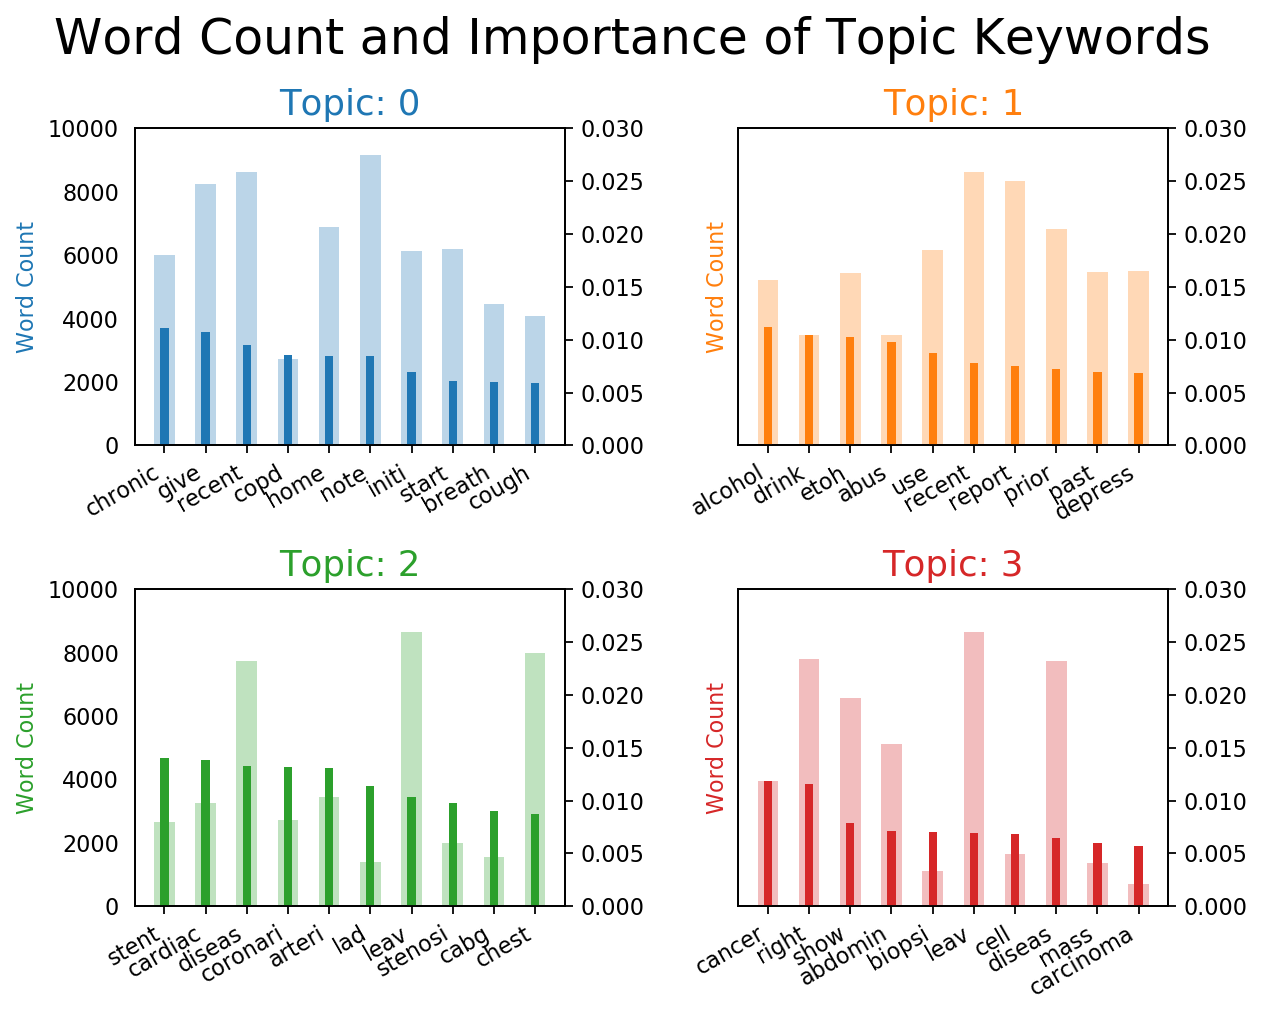

In [25]:
#create funcs and visualization for word count and weight of top words for each topic
from collections import Counter
topics = lda_model.show_topics(formatted=False, num_topics=20)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 10000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [26]:
#sorted and appending topics and percentages of the LDA topics
def topics_per_document(model, corpus):
    corpus_sel = corpus[0:-1]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(lda_model, bow_corpus)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [27]:
#each topics and the weights of each document
topic_weightage_by_doc

,1,10,13,14,18,5,12,16,3,6,17,0,11,9,7,19,2,4,15,8
0,0.056683,0.498381,0.392446,0.012093,0.036857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.529007,0.257957,NaN,0.153052,0.034328,0.015825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.114611,0.488623,0.123240,NaN,0.176807,NaN,0.093523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.523732,0.210294,NaN,0.078089,NaN,0.169377,0.015019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.159720,0.082018,NaN,0.052769,NaN,NaN,NaN,0.064393,0.47848,0.154608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10592,NaN,NaN,NaN,NaN,0.373496,NaN,0.121273,NaN,NaN,NaN,NaN,NaN,NaN,0.497838,NaN,NaN,NaN,NaN,NaN,NaN
10593,NaN,NaN,0.310582,0.234099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439862,NaN,NaN
10594,NaN,NaN,NaN,0.947217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10595,NaN,0.287652,0.699489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


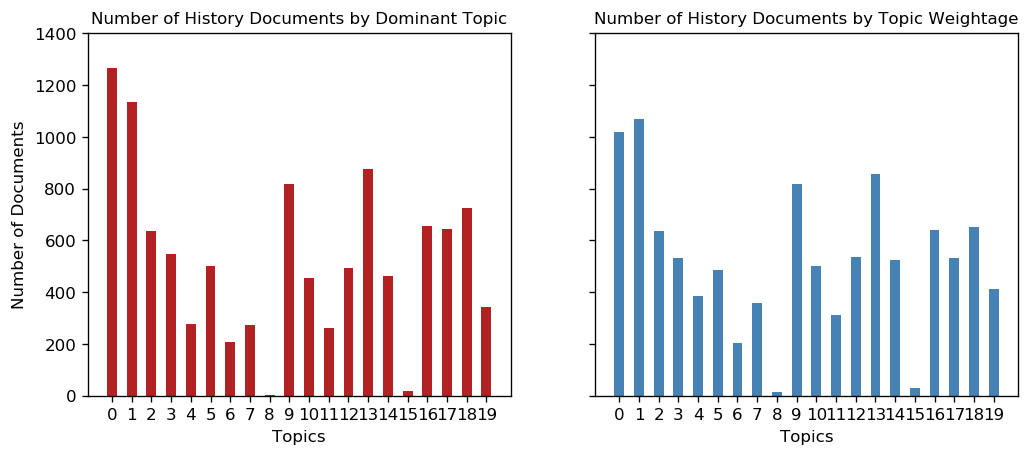

In [37]:
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
ax1.set_title('Number of History Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1400)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.set_title('Number of History Documents by Topic Weightage', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [29]:
# Visualize the topics and words
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
#vis

In [30]:
#train LDA model using TFIDF corpus, chunk size is 5000 documents, lda is updated after every chunk size, 2 full passes through the corpus for training, produce 10 topics
lda_model_tf = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5000,
                                           passes=2)

In [31]:
#using previous function to run with tf_idf lda model
df_topic_sents_keywords_tf = format_topics_sentences(ldamodel=lda_model_tf, corpus=corpus_tfidf, texts=processed_docs)

# Format
df_dominant_topic_tf = df_topic_sents_keywords_tf.reset_index()
df_dominant_topic_tf.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [32]:
#what is the min and max probability for matching a topic?
df_dominant_topic_tf['Topic_Perc_Contrib'].describe()

count    10598.000000
mean         0.658970
std          0.162244
min          0.050000
25%          0.521600
50%          0.651900
75%          0.810500
max          0.931600
Name: Topic_Perc_Contrib, dtype: float64

In [33]:
#how many per using tf-idf?
df_dominant_topic_tf.groupby('Dominant_Topic').size()

Dominant_Topic
0.0       14
1.0     2701
2.0       12
7.0       97
8.0        3
9.0     3599
10.0      23
12.0       5
13.0    3061
14.0      56
15.0     665
16.0     350
18.0       8
19.0       4
dtype: int64

In [34]:
dominant_topics_tf, topic_percentages_tf = topics_per_document(lda_model_tf, corpus_tfidf)            

# Distribution of Dominant Topics in Each Document
df_tf = pd.DataFrame(dominant_topics_tf, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_tf = df_tf.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_tf = dominant_topic_in_each_doc_tf.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_tf = pd.DataFrame([dict(t) for t in topic_percentages_tf])
df_topic_weightage_by_doc_tf = topic_weightage_by_doc_tf.sum().to_frame(name='count').reset_index()

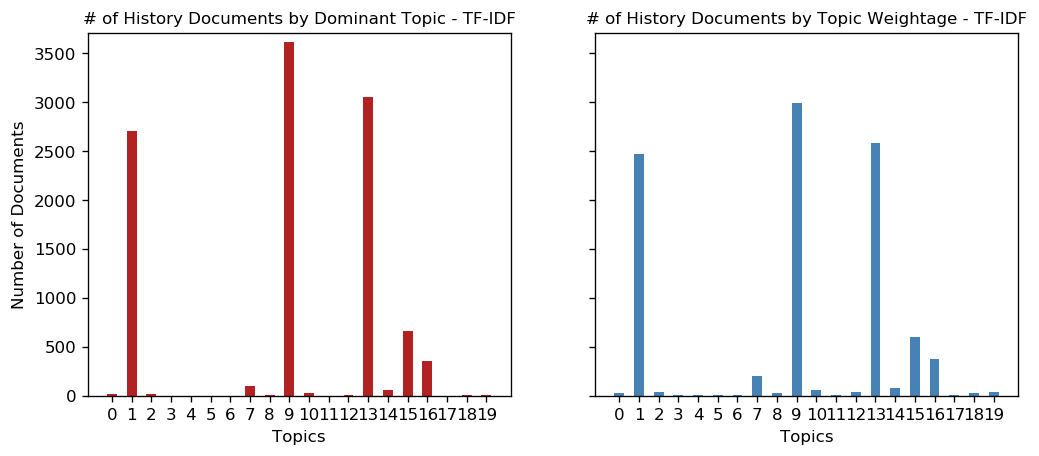

In [39]:
#numbers are based off TF-IDF 
#topic weightage is the sum of all documents that have a weight for that topic

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_tf, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of History Documents by Dominant Topic - TF-IDF', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 3700)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_tf, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc_tf.index.unique().__len__()))
ax2.set_title('# of History Documents by Topic Weightage - TF-IDF', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [24]:
#--------------------------------------------------------------------------------------------------------------------------------
## validation using diabetes subjects

In [36]:
diagnosis_icd9 = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/DIAGNOSES_ICD.csv", usecols= ["SUBJECT_ID", "ICD9_CODE"])
patients = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/PATIENTS.csv", parse_dates= ["DOB"], date_parser=dateparse, usecols=["SUBJECT_ID", "DOB"])
admissions = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/ADMISSIONS.csv", parse_dates= ["ADMITTIME"], date_parser=dateparse, usecols=["SUBJECT_ID", "ADMITTIME"])
notes = pd.read_csv("/project/projectdirs/m1532/Projects_MVP/_datasets/mimiciii/NOTEEVENTS.csv", usecols = ['SUBJECT_ID','CATEGORY', 'TEXT'])

In [40]:
#filter for only diabetes ICD9 codes
diag_db_DF = diagnosis_icd9[diagnosis_icd9["ICD9_CODE"].str.startswith(('159','167','181','226','227','644'), na = False)]
diag_db_DF.head()

,SUBJECT_ID,ICD9_CODE
6161,657,2270
13835,1343,226
25322,3193,64421
26877,3357,2270
30270,2159,2270


In [41]:
#merge diabetes dataframe with notes
icd9_db_notes = pd.merge(diag_db_DF, notes, on ='SUBJECT_ID')
icd9_db_notes

,SUBJECT_ID,ICD9_CODE,CATEGORY,TEXT
0,657,2270,Discharge summary,Admission Date: [**2124-9-6**] Discharge ...
1,657,2270,Discharge summary,Admission Date: [**2124-9-6**] Discharge ...
2,657,2270,Echo,PATIENT/TEST INFORMATION:\nIndication: HTN\nHe...
3,657,2270,ECG,Sinus rhythm\n- supraventricular extrasystoles...
4,657,2270,Radiology,PERSANTINE MIBI ...
...,...,...,...,...
9683,97842,2270,Radiology,[**2144-4-15**] 1:00 PM\n CT ABD W&W/O C ...
9684,97842,2270,Radiology,[**2144-4-13**] 2:35 PM\n CT HEAD W/O CONTRAST...
9685,97842,2270,Radiology,[**2144-4-13**] 2:24 PM\n CHEST (PORTABLE AP) ...
9686,97842,2270,Radiology,[**2144-3-25**] 9:41 AM\n CTA CHEST W&W/O C&RE...


In [42]:
#select only for discharge summary
icd9_db_notes = icd9_db_notes.loc[icd9_db_notes['CATEGORY'] == 'Discharge summary']

In [43]:
icd9_db_notes.drop_duplicates()

,SUBJECT_ID,ICD9_CODE,CATEGORY,TEXT
0,657,2270,Discharge summary,Admission Date: [**2124-9-6**] Discharge ...
1,657,2270,Discharge summary,Admission Date: [**2124-9-6**] Discharge ...
13,1343,226,Discharge summary,Admission Date: [**2146-3-10**] Dischar...
20,3193,64421,Discharge summary,Admission Date: [**2187-11-26**] ...
43,3357,2270,Discharge summary,Admission Date: [**2168-3-17**] ...
...,...,...,...,...
9376,98448,2273,Discharge summary,Admission Date: [**2132-7-29**] ...
9377,98448,2273,Discharge summary,"Name: [**Known lastname 10592**],[**Known fir..."
9384,97842,2270,Discharge summary,Admission Date: [**2143-11-20**] ...
9385,97842,2270,Discharge summary,Admission Date: [**2144-4-13**] ...


In [44]:
# Remove punctuation and anything that isnt a character or number 
icd9_db_notes['text_processed'] = icd9_db_notes['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
#remove numbers
icd9_db_notes['text_processed'] = icd9_db_notes['text_processed'].map(lambda x: re.sub('(\\s\\d+)', ' ', x))
# Convert to lowercase
icd9_db_notes['text_processed'] = icd9_db_notes['text_processed'].map(lambda x: x.lower())

In [45]:
#select for all the history section in the notes
icd9_db_notes['history'] = icd9_db_notes["text_processed"].apply(lambda st: st[st.find("history of present illness")+len("history of present illness"):st.find("physical exam")])

In [46]:
#remove the sub headers in the history section to ensure not weighted 
icd9_db_notes['WO_Headers'] = icd9_db_notes["history"].map(lambda x: re.sub('family history', '', x))
icd9_db_notes['WO_Headers'] = icd9_db_notes["WO_Headers"].map(lambda x: re.sub('social history', '', x))
icd9_db_notes['WO_Headers'] = icd9_db_notes["WO_Headers"].map(lambda x: re.sub('past medical history', '', x))

In [48]:
#adding additional index column for calling
index = tuple(range(0, 265, 1))
icd9_db_notes["index"] = index

In [49]:
# Print out the first rows of papers to ensure re working properly
icd9_db_notes

,SUBJECT_ID,ICD9_CODE,CATEGORY,TEXT,text_processed,history,WO_Headers,index
0,657,2270,Discharge summary,Admission Date: [**2124-9-6**] Discharge ...,admission date discharge date date of bi...,the patient was referred to dr last name stit...,the patient was referred to dr last name stit...,0
1,657,2270,Discharge summary,Admission Date: [**2124-9-6**] Discharge ...,admission date discharge date date of bi...,the patient was referred to dr last name stit...,the patient was referred to dr last name stit...,1
13,1343,226,Discharge summary,Admission Date: [**2146-3-10**] Dischar...,admission date discharge date date of bi...,ge date date of birth sex m service last...,ge date date of birth sex m service last...,2
20,3193,64421,Discharge summary,Admission Date: [**2187-11-26**] ...,admission date discharge date date of bi...,y o g2p1 w h o of end state kidney disease o...,y o g2p1 w h o of end state kidney disease o...,3
43,3357,2270,Discharge summary,Admission Date: [**2168-3-17**] ...,admission date discharge date date of bi...,yo man brought to osh on after being found ...,yo man brought to osh on after being found ...,4
...,...,...,...,...,...,...,...,...
9385,97842,2270,Discharge summary,Admission Date: [**2144-4-13**] ...,admission date discharge date date of bi...,yo man with history of depression and suicid...,yo man with history of depression and suicid...,260
9386,97842,2270,Discharge summary,"Name: [**Known lastname 13083**],[**Known fir...",name known lastname known firstname a unit n...,see original summary past medical history hyp...,see original summary hypertension dyslipidem...,261
9536,97842,2270,Discharge summary,Admission Date: [**2143-11-20**] ...,admission date discharge date date of bi...,mr known lastname is a year old male with kn...,mr known lastname is a year old male with kn...,262
9537,97842,2270,Discharge summary,Admission Date: [**2144-4-13**] ...,admission date discharge date date of bi...,yo man with history of depression and suicid...,yo man with history of depression and suicid...,263


In [62]:
icd9_db_notes.groupby(['SUBJECT_ID']).count()

,ICD9_CODE,CATEGORY,TEXT,text_processed,history,WO_Headers,index
SUBJECT_ID,,,,,,,
657,2,2,2,2,2,2,2
1343,1,1,1,1,1,1,1
1900,5,5,5,5,5,5,5
2159,2,2,2,2,2,2,2
3193,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
96741,3,3,3,3,3,3,3
97121,1,1,1,1,1,1,1
97813,1,1,1,1,1,1,1


In [75]:
diabetes_text = icd9_db_notes[['WO_Headers','index']]
diabetes_text

,WO_Headers,index
0,the patient was referred to dr last name stit...,0
1,the patient was referred to dr last name stit...,1
13,ge date date of birth sex m service last...,2
20,y o g2p1 w h o of end state kidney disease o...,3
43,yo man brought to osh on after being found ...,4
...,...,...
9385,yo man with history of depression and suicid...,260
9386,see original summary hypertension dyslipidem...,261
9536,mr known lastname is a year old male with kn...,262
9537,yo man with history of depression and suicid...,263


In [76]:
d_documents = diabetes_text

In [77]:
#use preprocess function 
d_proc_docs = d_documents['WO_Headers'].map(preprocess)

In [78]:
#create dictionary of words and number of appearances 
d_dictionary = gensim.corpora.Dictionary(d_proc_docs)
count = 0
for k, v in d_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abdomin
1 adenoma
2 admiss
3 adren
4 adrenalectomi
5 advis
6 afebril
7 area
8 benign
9 biopsi
10 blanch


In [79]:
#filter out words that appear in less than (15) documents
#only keep the first 10000
d_dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [80]:
#go through each document and report words and occurrences using doc2box for token id and amount
d_bow_corpus = [d_dictionary.doc2bow(doc) for doc in d_proc_docs]

In [81]:
## determine which topic a certain document belongs to
#150 is a sample index from the diseases of dispair group
for index, score in sorted(lda_model[bow_corpus[150]], key=lambda tup: -1*tup[1]):
    print("Score: {}\t \nTopic: {} ".format(score, lda_model.print_topic(index, 10)))

Score: 0.4550536274909973	 
Topic: 0.010*"abdomin" + 0.010*"give" + 0.008*"recent" + 0.008*"transfer" + 0.008*"note" + 0.007*"fever" + 0.006*"chest" + 0.006*"diarrhea" + 0.006*"vomit" + 0.006*"nausea" 
Score: 0.2635907530784607	 
Topic: 0.012*"cancer" + 0.012*"right" + 0.008*"show" + 0.007*"abdomin" + 0.007*"biopsi" + 0.007*"leav" + 0.007*"cell" + 0.006*"diseas" + 0.006*"mass" + 0.006*"carcinoma" 
Score: 0.1604975312948227	 
Topic: 0.011*"review" + 0.011*"chest" + 0.010*"recent" + 0.010*"system" + 0.008*"dyspnea" + 0.008*"cough" + 0.008*"prior" + 0.007*"cardiac" + 0.007*"report" + 0.007*"note" 
Score: 0.07600805908441544	 
Topic: 0.012*"leav" + 0.009*"surgeri" + 0.009*"right" + 0.007*"infect" + 0.006*"abdomin" + 0.006*"repair" + 0.006*"diseas" + 0.006*"aortic" + 0.005*"undergo" + 0.005*"wind" 
Score: 0.03945136442780495	 
Topic: 0.021*"intub" + 0.011*"show" + 0.011*"start" + 0.011*"transfer" + 0.010*"give" + 0.009*"sedat" + 0.009*"initi" + 0.008*"note" + 0.008*"receiv" + 0.007*"statu" 

In [82]:
## determine which topic a certain document belongs to
#200 is a sample index from the diabetes group
for index, score in sorted(lda_model[d_bow_corpus[200]], key=lambda tup: -1*tup[1]):
    print("Score: {}\t \nTopic: {} ".format(score, lda_model.print_topic(index, 10)))

Score: 0.3160991370677948	 
Topic: 0.044*"tablet" + 0.025*"daili" + 0.024*"sig" + 0.021*"discharg" + 0.013*"medic" + 0.011*"blood" + 0.011*"time" + 0.010*"need" + 0.010*"hour" + 0.009*"refil" 
Score: 0.3047862648963928	 
Topic: 0.012*"leav" + 0.009*"surgeri" + 0.009*"right" + 0.007*"infect" + 0.006*"abdomin" + 0.006*"repair" + 0.006*"diseas" + 0.006*"aortic" + 0.005*"undergo" + 0.005*"wind" 
Score: 0.13379885256290436	 
Topic: 0.033*"leav" + 0.024*"right" + 0.008*"show" + 0.007*"side" + 0.006*"aneurysm" + 0.006*"fractur" + 0.006*"weak" + 0.006*"know" + 0.005*"old" + 0.005*"transfer" 
Score: 0.11781354993581772	 
Topic: 0.019*"seizur" + 0.011*"note" + 0.010*"disord" + 0.010*"report" + 0.009*"give" + 0.007*"medic" + 0.007*"mother" + 0.007*"transfer" + 0.007*"depress" + 0.007*"suicid" 
Score: 0.10918918251991272	 
Topic: 0.019*"medic" + 0.015*"admiss" + 0.014*"emerg" + 0.014*"blood" + 0.014*"statu" + 0.013*"post" + 0.011*"allergi" + 0.009*"discharg" + 0.008*"room" + 0.008*"time" 


In [83]:
#using previous function to run with tf_idf lda model
df_topic_sents_keywords_d = format_topics_sentences(ldamodel=lda_model, corpus=d_bow_corpus, texts=d_proc_docs)

# Format
df_dominant_topic_d = df_topic_sents_keywords_d.reset_index()
df_dominant_topic_d.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_d.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.4226,"leav, surgeri, right, infect, abdomin, repair,...","[patient, refer, stitl, laparoscop, excis, kno..."
1,1,10.0,0.4229,"leav, surgeri, right, infect, abdomin, repair,...","[patient, refer, stitl, laparoscop, excis, kno..."
2,2,10.0,0.4267,"leav, surgeri, right, infect, abdomin, repair,...",NaN
3,3,12.0,0.4409,"review, chest, recent, system, dyspnea, cough,...",NaN
4,4,13.0,0.4302,"diseas, hypertens, chest, diabet, tobacco, ago...",NaN
5,5,13.0,0.4955,"diseas, hypertens, chest, diabet, tobacco, ago...",NaN
6,6,12.0,0.2682,"review, chest, recent, system, dyspnea, cough,...",NaN
7,7,12.0,0.2700,"review, chest, recent, system, dyspnea, cough,...",NaN
8,8,1.0,0.3419,"alcohol, drink, etoh, abus, use, recent, repor...",NaN
9,9,10.0,0.3649,"leav, surgeri, right, infect, abdomin, repair,...",NaN


In [84]:
#sorted and appending topics and percentages of the LDA topics for diabetes 
dominant_topics_d, topic_percentages_d = topics_per_document(lda_model, d_bow_corpus)            

# Distribution of Dominant Topics in Each Document
df_d = pd.DataFrame(dominant_topics_d, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_d = df_d.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_d = dominant_topic_in_each_doc_d.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_d = pd.DataFrame([dict(t) for t in topic_percentages_d])
df_topic_weightage_by_doc_d = topic_weightage_by_doc_d.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words_d = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked_d = pd.DataFrame(topic_top3words_d, columns=['topic_id', 'words'])
df_top3words_d = df_top3words_stacked_d.groupby('topic_id').agg(', \n'.join)
df_top3words_d.reset_index(level=0,inplace=True)

In [85]:
df_dominant_topic_d.groupby('Dominant_Topic').size()

Dominant_Topic
0.0      3
1.0     43
3.0     10
6.0      7
9.0      1
10.0    97
11.0     2
12.0    19
13.0    31
14.0     3
16.0     4
17.0     6
18.0    38
19.0     1
dtype: int64

In [86]:
#what is the min and max probability for matching a topic?
df_dominant_topic_d['Topic_Perc_Contrib'].describe()

count    265.000000
mean       0.350628
std        0.092858
min        0.188100
25%        0.287000
50%        0.333500
75%        0.393800
max        0.689500
Name: Topic_Perc_Contrib, dtype: float64

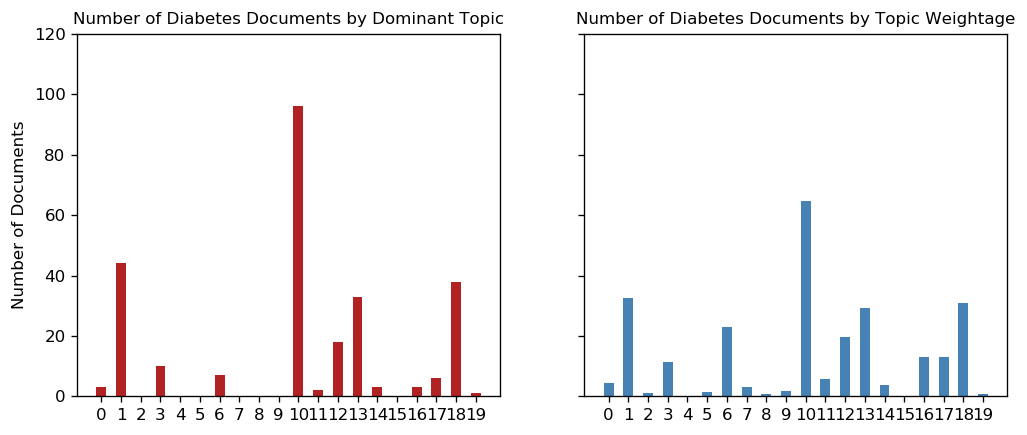

In [128]:
#topic weightage is the sum of all documents that have a weight for that topic
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

tick_formatter_d = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[1])

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_d, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('Number of Diabetes Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 120)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_d, width=.5, color='steelblue')
ax2.set_xticks(range(0,20))
ax2.set_title('Number of Diabetes Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [50]:
# subject 97842 of diabetes group 
diabetes_97842 = icd9_db_notes.loc[icd9_db_notes['SUBJECT_ID'] == 97842]

In [51]:
diabetes_97842 = diabetes_97842.reset_index()

In [52]:
#use preprocess function on subjects documents
processed_97842 = diabetes_97842['text_processed'].map(preprocess)

In [53]:
#create dictionary of words
dictionary_97842 = gensim.corpora.Dictionary(processed_97842)

In [55]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus_97842 = [dictionary_97842.doc2bow(doc) for doc in processed_97842]

In [56]:
df_topic_sents_keywords_97842 = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus_97842, texts=processed_97842)

# Format
df_dominant_topic_97842 = df_topic_sents_keywords_97842.reset_index()
df_dominant_topic_97842.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_97842.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.2162,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
1,1,10.0,0.2332,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
2,2,1.0,0.2805,"alcohol, drink, etoh, abus, use, recent, repor...","[know, lastnam, know, firstnam, unit, numer, i..."
3,3,10.0,0.2159,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
4,4,10.0,0.2330,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
5,5,1.0,0.2805,"alcohol, drink, etoh, abus, use, recent, repor...","[know, lastnam, know, firstnam, unit, numer, i..."


In [57]:
#sorted and appending topics and percentages of the LDA topics
dominant_topics_97842, topic_percentages_97842 = topics_per_document(lda_model, bow_corpus_97842)            

# Distribution of Dominant Topics in Each Document
df_97842 = pd.DataFrame(dominant_topics_97842, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_97842 = df_97842.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_97842 = dominant_topic_in_each_doc_97842.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_97842 = pd.DataFrame([dict(t) for t in topic_percentages_97842])
df_topic_weightage_by_doc_97842 = topic_weightage_by_doc_97842.sum().to_frame(name='count').reset_index()

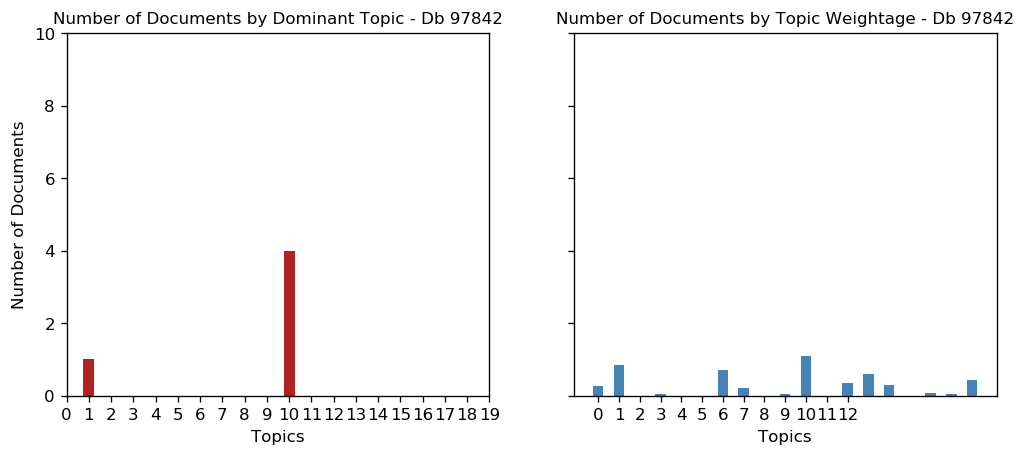

In [59]:
# Plot for subject 97842 comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_97842, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('Number of Documents by Dominant Topic - Db 97842', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 10)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_97842, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc_97842.index.unique().__len__()))
ax2.set_title('Number of Documents by Topic Weightage - Db 97842', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [63]:
# subject 1900 of diabetes group 
diabetes_1900 = icd9_db_notes.loc[icd9_db_notes['SUBJECT_ID'] == 1900]

In [64]:
diabetes_1900 = diabetes_1900.reset_index()

In [65]:
#use preprocess function on subjects documents
processed_1900 = diabetes_1900['text_processed'].map(preprocess)

In [66]:
#create dictionary of words
dictionary_1900 = gensim.corpora.Dictionary(processed_1900)

In [67]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus_1900 = [dictionary_1900.doc2bow(doc) for doc in processed_1900]

In [68]:
df_topic_sents_keywords_1900 = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus_1900, texts=processed_1900)

# Format
df_dominant_topic_1900 = df_topic_sents_keywords_1900.reset_index()
df_dominant_topic_1900.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_1900.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.3276,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
1,1,6.0,0.3102,"tablet, daili, sig, discharg, medic, blood, ti...","[admiss, date, discharg, date, date, birth, se..."
2,2,10.0,0.2704,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
3,3,10.0,0.2461,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."
4,4,10.0,0.2178,"leav, surgeri, right, infect, abdomin, repair,...","[admiss, date, discharg, date, date, birth, se..."


In [69]:
#sorted and appending topics and percentages of the LDA topics
dominant_topics_1900, topic_percentages_1900 = topics_per_document(lda_model, bow_corpus_1900)            

# Distribution of Dominant Topics in Each Document
df_1900 = pd.DataFrame(dominant_topics_1900, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_1900 = df_1900.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_1900 = dominant_topic_in_each_doc_1900.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_1900 = pd.DataFrame([dict(t) for t in topic_percentages_1900])
df_topic_weightage_by_doc_1900 = topic_weightage_by_doc_1900.sum().to_frame(name='count').reset_index()

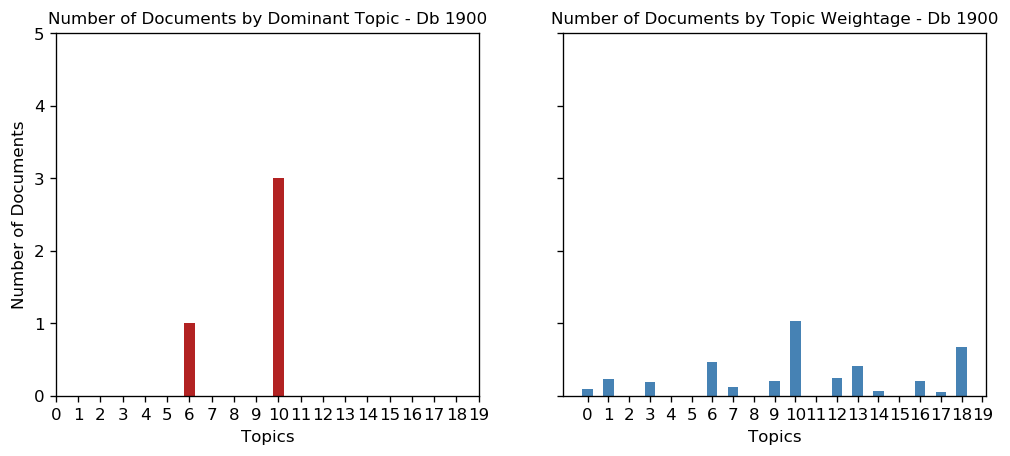

In [87]:
# Plot for subject 1900 comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_1900, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('Number of Documents by Dominant Topic - Db 1900', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 5)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_1900, width=.5, color='steelblue')
ax2.set_xticks(range(0,20))
ax2.set_title('Number of Documents by Topic Weightage - Db 1900', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

# Now lets look at Suicide Attempt Subjects and their history

In [88]:
#filter for only suicide attempts ICD9 codes
diag_suicide_DF = diagnosis_icd9[diagnosis_icd9["ICD9_CODE"].str.startswith(('E95'), na = False)]
diag_suicide_DF.head()

,SUBJECT_ID,ICD9_CODE
102,119,E956
350,71,E9503
760,22,E9502
761,22,E9503
2036,303,E9500


In [89]:
#merge suicide dataframe with notes
icd9_suicide = pd.merge(diag_suicide_DF, notes, on ='SUBJECT_ID')

In [90]:
#bring in the admittime column from separate csv
icd9_suicide = pd.merge(icd9_suicide, admissions, on="SUBJECT_ID")

In [91]:
#select only for discharge summary
icd9_suicide_notes = icd9_suicide.loc[icd9_suicide['CATEGORY'] == 'Discharge summary']

In [92]:
icd9_suicide_notes = icd9_suicide_notes.drop_duplicates()

In [94]:
# Remove punctuation and anything that isnt a character or number 
icd9_suicide_notes['text_processed'] = icd9_suicide_notes['TEXT'].map(lambda x: re.sub('[_\\W]+', ' ', x))
#remove numbers
icd9_suicide_notes['text_processed'] = icd9_suicide_notes['text_processed'].map(lambda x: re.sub('(\\s\\d+)', ' ', x))
# Convert to lowercase
icd9_suicide_notes['text_processed'] = icd9_suicide_notes['text_processed'].map(lambda x: x.lower())

In [95]:
#select for all the history section in the notes
icd9_suicide_notes['history'] = icd9_suicide_notes["text_processed"].apply(lambda st: st[st.find("history of present illness")+len("history of present illness"):st.find("physical exam")])

In [96]:
#remove the sub headers in the history section to ensure not weighted 
icd9_suicide_notes['WO_Headers'] = icd9_suicide_notes["history"].map(lambda x: re.sub('family history', '', x))
icd9_suicide_notes['WO_Headers'] = icd9_suicide_notes["WO_Headers"].map(lambda x: re.sub('social history', '', x))
icd9_suicide_notes['WO_Headers'] = icd9_suicide_notes["WO_Headers"].map(lambda x: re.sub('past medical history', '', x))

In [98]:
#adding additional index column for calling
index = tuple(range(0, 1585, 1))
icd9_suicide_notes["index"] = index

In [99]:
icd9_suicide_notes

,SUBJECT_ID,ICD9_CODE,CATEGORY,TEXT,ADMITTIME,text_processed,history,WO_Headers,index
9,71,E9503,Discharge summary,Admission Date: [**2164-2-3**] D...,2164-02-03 22:07:00,admission date discharge date date of bi...,pt is f h o schizophrenia admitted for clozap...,pt is f h o schizophrenia admitted for clozap...,0
22,22,E9502,Discharge summary,Admission Date: [**2196-4-9**] Discharg...,2196-04-09 12:26:00,admission date discharge date date of bi...,the patient is a year old female with a hist...,the patient is a year old female with a hist...,1
32,22,E9503,Discharge summary,Admission Date: [**2196-4-9**] Discharg...,2196-04-09 12:26:00,admission date discharge date date of bi...,the patient is a year old female with a hist...,the patient is a year old female with a hist...,2
42,303,E9500,Discharge summary,Admission Date: [**2160-3-17**] Discharge...,2160-03-17 18:37:00,admission date discharge date date of bi...,this year old male was an unrestrained drive...,this year old male was an unrestrained drive...,3
43,303,E9500,Discharge summary,Admission Date: [**2160-3-17**] Discharge...,2163-03-29 23:04:00,admission date discharge date date of bi...,this year old male was an unrestrained drive...,this year old male was an unrestrained drive...,4
...,...,...,...,...,...,...,...,...,...
42488,98177,E9588,Discharge summary,Admission Date: [**2145-8-11**] ...,2145-08-11 02:36:00,admission date discharge date date of bi...,hpi yom with possible intoxication today poss...,hpi yom with possible intoxication today poss...,1580
42491,99868,E9500,Discharge summary,Admission Date: [**2142-9-7**] D...,2142-09-07 05:36:00,admission date discharge date date of bi...,yo f with hx of depression w si on effexor n...,yo f with hx of depression w si on effexor n...,1581
42494,99868,E9503,Discharge summary,Admission Date: [**2142-9-7**] D...,2142-09-07 05:36:00,admission date discharge date date of bi...,yo f with hx of depression w si on effexor n...,yo f with hx of depression w si on effexor n...,1582
42497,99868,E9509,Discharge summary,Admission Date: [**2142-9-7**] D...,2142-09-07 05:36:00,admission date discharge date date of bi...,yo f with hx of depression w si on effexor n...,yo f with hx of depression w si on effexor n...,1583


In [100]:
#select only for subject 303 that has attempted suicide
documents_303 = icd9_suicide_notes.loc[icd9_suicide_notes['SUBJECT_ID'] == 303]

In [101]:
#resetting index because following code for dataframe has trouble identifying text when pulling from middle of dataframe
documents_303 = documents_303.reset_index()

In [102]:
#use preprocess function on suicide attempt subjects
processed_docs_303 = documents_303['text_processed'].map(preprocess)

In [103]:
#create dictionary of words
dictionary_303s = gensim.corpora.Dictionary(processed_docs_303)

In [104]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus_303s = [dictionary_303s.doc2bow(doc) for doc in processed_docs_303]

In [105]:
#sorted and appending topics and percentages of the LDA topics (function can be found above)
dominant_topics_303, topic_percentages_303 = topics_per_document(lda_model, bow_corpus_303s)            

# Distribution of Dominant Topics in Each Document
df_303 = pd.DataFrame(dominant_topics_303, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_303 = df_303.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_303 = dominant_topic_in_each_doc_303.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_303 = pd.DataFrame([dict(t) for t in topic_percentages_303])
df_topic_weightage_by_doc_303 = topic_weightage_by_doc_303.sum().to_frame(name='count').reset_index()

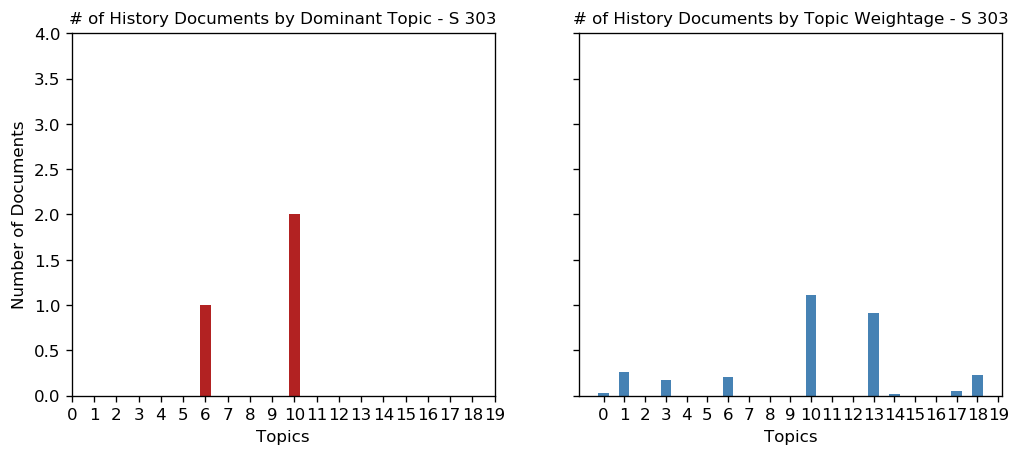

In [110]:
# Plot for subject 303 comparing document topics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_303, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of History Documents by Dominant Topic - S 303', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 4)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_303, width=.5, color='steelblue')
ax2.set_xticks(range(0,20))
ax2.set_title('# of History Documents by Topic Weightage - S 303', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [111]:
#select only for subject 99868 that has attempted suicide
documents_99868 = icd9_suicide_notes.loc[icd9_suicide_notes['SUBJECT_ID'] == 99868]

In [112]:
#resetting index 
documents_99868 = documents_99868.reset_index()

In [114]:
#use preprocess function on suicide attempt subjects
processed_docs_99868 = documents_99868['text_processed'].map(preprocess)

In [115]:
#create dictionary of words
dictionary_99868s = gensim.corpora.Dictionary(processed_docs_99868)

In [116]:
#go through each document and report words and occurrences using doc2box for token id and amount
bow_corpus_99868s = [dictionary_99868s.doc2bow(doc) for doc in processed_docs_99868]

In [117]:
#sorted and appending topics and percentages of the LDA topics (function can be found above)
dominant_topics_99868, topic_percentages_99868 = topics_per_document(lda_model, bow_corpus_99868s)            

# Distribution of Dominant Topics in Each Document
df_99868 = pd.DataFrame(dominant_topics_99868, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_99868 = df_99868.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_99868 = dominant_topic_in_each_doc_99868.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_99868 = pd.DataFrame([dict(t) for t in topic_percentages_99868])
df_topic_weightage_by_doc_99868 = topic_weightage_by_doc_99868.sum().to_frame(name='count').reset_index()

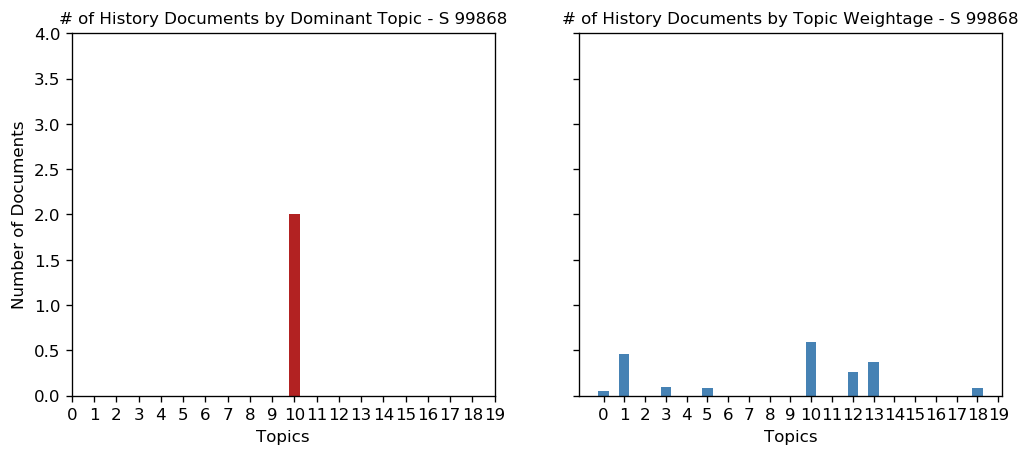

In [118]:
# Plot for subject 99868 comparing document topics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_99868, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of History Documents by Dominant Topic - S 99868', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 4)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_99868, width=.5, color='steelblue')
ax2.set_xticks(range(0,20))
ax2.set_title('# of History Documents by Topic Weightage - S 99868', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [119]:
suicide_text = icd9_suicide_notes[['WO_Headers','index']]
suicide_text

,WO_Headers,index
9,pt is f h o schizophrenia admitted for clozap...,0
22,the patient is a year old female with a hist...,1
32,the patient is a year old female with a hist...,2
42,this year old male was an unrestrained drive...,3
43,this year old male was an unrestrained drive...,4
...,...,...
42488,hpi yom with possible intoxication today poss...,1580
42491,yo f with hx of depression w si on effexor n...,1581
42494,yo f with hx of depression w si on effexor n...,1582
42497,yo f with hx of depression w si on effexor n...,1583


In [120]:
#use preprocess function on entire documents for suicide attempt
s_proc_docs = suicide_text['WO_Headers'].map(preprocess)

In [121]:
#create dictionary of words and number of appearances 
s_dictionary = gensim.corpora.Dictionary(s_proc_docs)

In [122]:
#filter out words that appear in less than (15) documents
#only keep the first 10000
s_dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [123]:
#go through each document and report words and occurrences using doc2box for token id and amount
s_bow_corpus = [s_dictionary.doc2bow(doc) for doc in s_proc_docs]

In [124]:
#sorted and appending topics and percentages of the LDA topics (function can be found above)
dominant_topics_s, topic_percentages_s = topics_per_document(lda_model, s_bow_corpus)            

# Distribution of Dominant Topics in Each Document
df_s = pd.DataFrame(dominant_topics_s, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc_s = df_s.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc_s = dominant_topic_in_each_doc_s.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc_s = pd.DataFrame([dict(t) for t in topic_percentages_s])
df_topic_weightage_by_doc_s = topic_weightage_by_doc_s.sum().to_frame(name='count').reset_index()

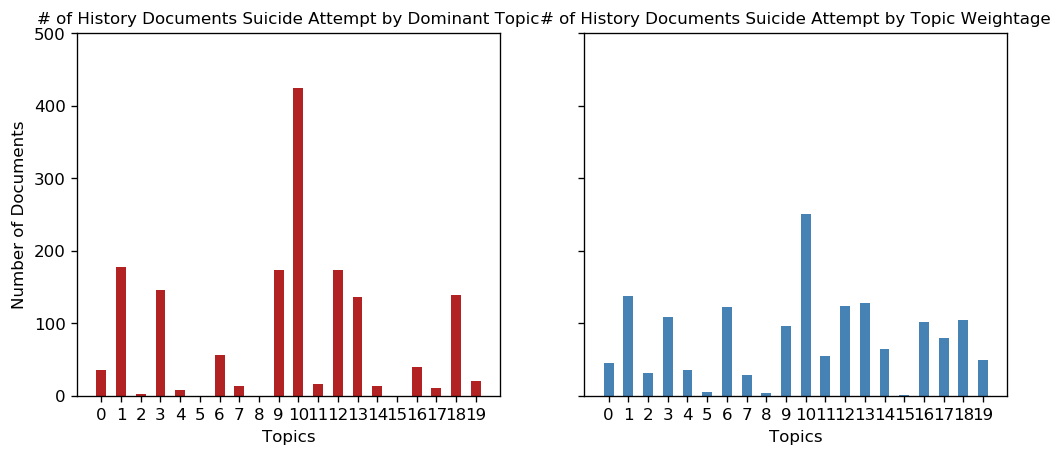

In [127]:
# Plot for comparing document topics from suicide attempts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc_s, width=.5, color='firebrick')
ax1.set_xticks(range(0,20))
ax1.set_title('# of History Documents Suicide Attempt by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 500)
ax1.set_xlabel('Topics')

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc_s, width=.5, color='steelblue')
ax2.set_xticks(range(0,20))
ax2.set_title('# of History Documents Suicide Attempt by Topic Weightage', fontdict=dict(size=10))
ax2.set_xlabel('Topics')

plt.show()

In [129]:
df_topic_sents_keywords_s = format_topics_sentences(ldamodel=lda_model, corpus=s_bow_corpus, texts=s_proc_docs)

# Format
df_dominant_topic_s = df_topic_sents_keywords_s.reset_index()
df_dominant_topic_s.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic_s.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.4997,"leav, surgeri, right, infect, abdomin, repair,...",NaN
1,1,10.0,0.4666,"leav, surgeri, right, infect, abdomin, repair,...",NaN
2,2,10.0,0.4666,"leav, surgeri, right, infect, abdomin, repair,...",NaN
3,3,13.0,0.6030,"diseas, hypertens, chest, diabet, tobacco, ago...",NaN
4,4,13.0,0.6029,"diseas, hypertens, chest, diabet, tobacco, ago...",NaN
5,5,18.0,0.4154,"abdomin, give, recent, transfer, note, fever, ...",NaN
6,6,18.0,0.4155,"abdomin, give, recent, transfer, note, fever, ...",NaN
7,7,12.0,0.3308,"review, chest, recent, system, dyspnea, cough,...",NaN
8,8,18.0,0.3056,"abdomin, give, recent, transfer, note, fever, ...",NaN
9,9,6.0,0.3193,"tablet, daili, sig, discharg, medic, blood, ti...","[schizophrenia, admit, clozapin, overdos, repo..."


In [130]:
#what is the min and max probability for matching a topic?
df_dominant_topic_s['Topic_Perc_Contrib'].describe()

count    1585.000000
mean        0.263931
std         0.087022
min         0.124800
25%         0.203200
50%         0.243900
75%         0.308900
max         0.681200
Name: Topic_Perc_Contrib, dtype: float64